In [12]:
import pandas as pd
import glob
import os

path = r"D:\cricket_prediction_new"
files = glob.glob(os.path.join(path, "*.csv"))

runs_list = []
wickets_list = []

for file in files:
    df = pd.read_csv(file)
    print(os.path.basename(file), "→", list(df.columns))  # just to see what's inside

    # Standardise possible column names (edit this mapping if needed)
    df = df.rename(columns={
        "Runs": "runs",
        "Score": "runs",
        "TotalRuns": "runs",
        "total_runs": "runs",
        "Wkts": "wickets",
        "Wicket": "wickets",
        "Wickets": "wickets",
        "wickets_lost": "wickets"
    })

    # Add only if the column exists in that file
    if "runs" in df.columns:
        runs_list.append(df["runs"])

    if "wickets" in df.columns:
        wickets_list.append(df["wickets"])

# 👇 Now combine, but only if we actually collected something

if runs_list:
    runs_df = pd.concat(runs_list, ignore_index=True)
else:
    print("⚠️ No 'runs' column found in any CSV files.")

if wickets_list:
    wickets_df = pd.concat(wickets_list, ignore_index=True)
else:
    print("⚠️ No 'wickets' column found in any CSV files.")


Players_cleaned.csv → ['Player_Name', 'Batting_Hand', 'Bowling_Skill']
⚠️ No 'runs' column found in any CSV files.
⚠️ No 'wickets' column found in any CSV files.


In [13]:
import glob
import os

root = r"D:\cricket_prediction_new"

all_csvs = glob.glob(os.path.join(root, "**", "*.csv"), recursive=True)

for f in all_csvs:
    print(f)


D:\cricket_prediction_new\Players_cleaned.csv


In [3]:
runs_list = []
wickets_list = []


In [6]:
runs_list = []
wickets_list = []

for file in files:
    df = pd.read_csv(file)

    df = df.rename(columns={
        "Runs": "runs",
        "Score": "runs",
        "TotalRuns": "runs",
        "Wkts": "wickets",
        "Wicket": "wickets",
        "Wickets": "wickets"
    })

    # Add runs ONLY if column exists AND NOT empty
    if "runs" in df.columns:
        if df['runs'].notna().any():   # has real values
            runs_list.append(df['runs'])

    # Add wickets ONLY if column exists AND NOT empty
    if "wickets" in df.columns:
        if df['wickets'].notna().any():
            wickets_list.append(df['wickets'])



In [8]:
runs_list


[]

In [9]:
runs_list = [s for s in runs_list if len(s) > 0]
wickets_list = [s for s in wickets_list if len(s) > 0]


In [10]:
runs_df = pd.concat(runs_list, ignore_index=True)
wickets_df = pd.concat(wickets_list, ignore_index=True)


ValueError: No objects to concatenate

In [11]:
for f in files:
    df = pd.read_csv(f)
    print(f, df.columns)


D:\cricket_prediction_new\Players_cleaned.csv Index(['Player_Name', 'Batting_Hand', 'Bowling_Skill'], dtype='object')


In [17]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


      Player_Name  Batting_Hand  Bowling_Skill
0  A Ashish Reddy             1             10
1      A Chandila             1             12
2        A Chopra             1             12
3     A Choudhary             1              1
4     A Dananjaya             1             12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Player_Name    566 non-null    object
 1   Batting_Hand   566 non-null    int64 
 2   Bowling_Skill  566 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.4+ KB
None
Player_Name      0
Batting_Hand     0
Bowling_Skill    0
dtype: int64
Batting_Hand
1    424
0    142
Name: count, dtype: int64
Bowling_Skill
10    108
12     91
9      68
6      64
14     50
8      40
11     38
4      30
5      28
1      19
2      11
3       9
13      5
0       4
7       1
Name: count, dtype: int64


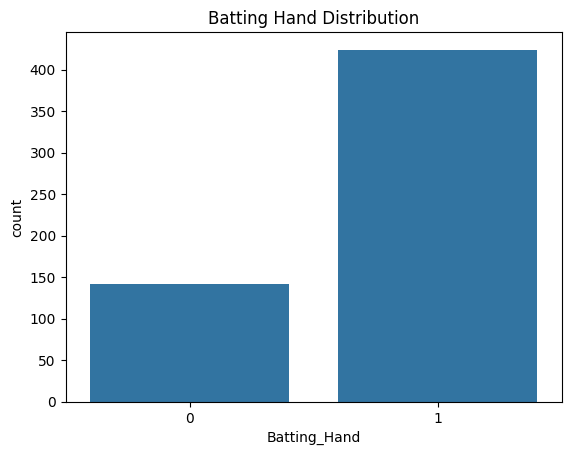

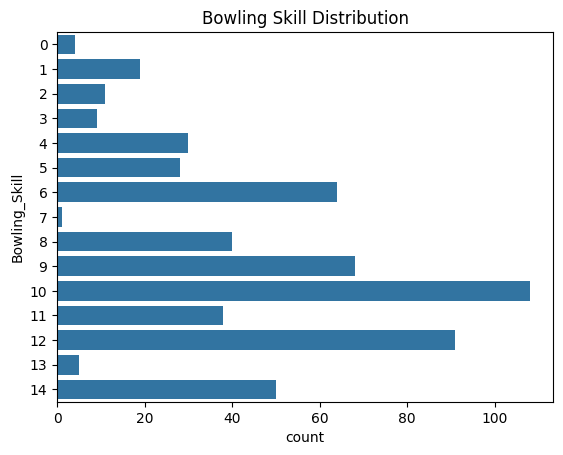

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = r"D:\cricket_prediction_new\Players_cleaned.csv"
df = pd.read_csv(path)

print(df.head())
print(df.info())

print(df.isnull().sum())

print(df['Batting_Hand'].value_counts())
print(df['Bowling_Skill'].value_counts())

sns.countplot(x='Batting_Hand', data=df)
plt.title("Batting Hand Distribution")

plt.figure()
sns.countplot(y='Bowling_Skill', data=df)
plt.title("Bowling Skill Distribution")
plt.show()


In [1]:
import pandas as pd

In [3]:
deliveries=pd.read_csv(r"D:\new_cricket_prediction\deliveries_cleaned_final.xls")
matches=pd.read_csv(r"D:\new_cricket_prediction\matches_cleaned_final.csv")
players=pd.read_csv(r"D:\new_cricket_prediction\players_cleaned_final.xls")
run_strikes=pd.read_csv(r"D:\new_cricket_prediction\updated_run_strikes_upper.csv")
teams=pd.read_csv(r"D:\new_cricket_prediction\updated_teams.csv")

In [4]:
dev=deliveries.merge( matches[['id', 'venue', 'year']],
    left_on='match_id',
    right_on='id',
    how='left')
dev.drop(columns=['id'],inplace=True)

In [5]:
venue_matches = matches.groupby('venue').size().reset_index(name='total_matches')
venue_matches


,venue,total_matches
0,ACA-VDCA STADIUM,2
1,BARABATI STADIUM,7
2,BRABOURNE STADIUM,11
3,BUFFALO PARK,3
4,DE BEERS DIAMOND OVAL,3
5,DR DY PATIL SPORTS ACADEMY,17
6,DR. Y.S. RAJASEKHARA REDDY ACA-VDCA CRICKET ST...,11
7,DUBAI INTERNATIONAL CRICKET STADIUM,7
8,EDEN GARDENS,77
9,FEROZ SHAH KOTLA,67


In [6]:
venue_team_win = matches.groupby(['venue', 'winner_franchise']).size().reset_index(name='wins')


venue_total = matches.groupby('venue').size().reset_index(name='total_matches')

venue_team_win = venue_team_win.merge(venue_total, on='venue')
venue_team_win['win_percentage'] = (venue_team_win['wins'] / venue_team_win['total_matches'] * 100).round(2)

venue_team_win


,venue,winner_franchise,wins,total_matches,win_percentage
0,ACA-VDCA STADIUM,CHENNAI SUPER KINGS,1,2,50.00
1,ACA-VDCA STADIUM,DELHI CAPITALS,1,2,50.00
2,BARABATI STADIUM,DECCAN CHARGERS,3,7,42.86
3,BARABATI STADIUM,KINGS XI PUNJAB,1,7,14.29
4,BARABATI STADIUM,KOLKATA KNIGHT RIDERS,3,7,42.86
...,...,...,...,...,...
244,WANKHEDE STADIUM,RAJASTHAN ROYALS,4,73,5.48
245,WANKHEDE STADIUM,RISING PUNE SUPERGIANT,2,73,2.74
246,WANKHEDE STADIUM,RISING PUNE SUPERGIANTS,1,73,1.37
247,WANKHEDE STADIUM,ROYAL CHALLENGERS BANGALORE,3,73,4.11


In [10]:
venue_team_runs = dev.groupby(['venue', 'batting_team_franchies'])['total_runs'].sum().reset_index()
venue_team_runs


,venue,batting_team_franchies,total_runs
0,ACA-VDCA STADIUM,Chennai,162
1,ACA-VDCA STADIUM,Delhi,325
2,ACA-VDCA STADIUM,Hydrabad,171
3,BARABATI STADIUM,Chennai,187
4,BARABATI STADIUM,Delhi,161
...,...,...,...
320,WANKHEDE STADIUM,Mumbai,11030
321,WANKHEDE STADIUM,Pune,515
322,WANKHEDE STADIUM,Punjab,1968
323,WANKHEDE STADIUM,Rajasthan,1389


In [13]:
venue_wickets = dev[deliveries['player_dismissed'] != 'NOT OUT'] \
    .groupby(['venue', 'bowling_team_franchies']) \
    .size().reset_index(name='wickets')

venue_wickets


,venue,bowling_team_franchies,wickets
0,ACA-VDCA STADIUM,Chennai,9
1,ACA-VDCA STADIUM,Delhi,11
2,ACA-VDCA STADIUM,Hydrabad,7
3,BARABATI STADIUM,Chennai,4
4,BARABATI STADIUM,Delhi,6
...,...,...,...
320,WANKHEDE STADIUM,Mumbai,422
321,WANKHEDE STADIUM,Pune,23
322,WANKHEDE STADIUM,Punjab,65
323,WANKHEDE STADIUM,Rajasthan,50


C:\Users\HP\AppData\Local\Temp\ipykernel_36992\1481167055.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=venue_matches, x='count', y='venue', palette='viridis')


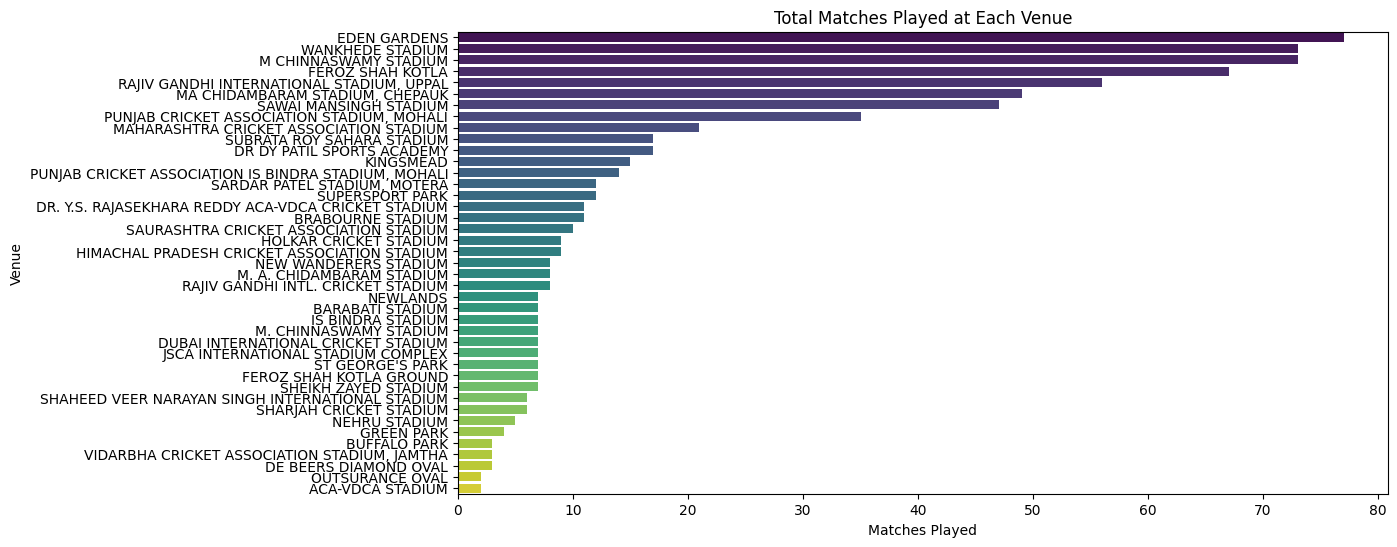

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

venue_matches = matches['venue'].value_counts().reset_index()
venue_matches.columns = ['venue', 'count']

plt.figure(figsize=(12,6))
sns.barplot(data=venue_matches, x='count', y='venue', palette='viridis')
plt.title("Total Matches Played at Each Venue")
plt.xlabel("Matches Played")
plt.ylabel("Venue")
plt.show()


In [15]:
team_wins = matches['winner_franchise'].value_counts().reset_index()
team_wins.columns = ['team', 'wins']

team_matches = (
    matches['team1_franchise'].value_counts() +
    matches['team2_franchise'].value_counts()
).reset_index()
team_matches.columns = ['team', 'matches']

team_perf = team_wins.merge(team_matches, on='team', how='right')
team_perf['win_percentage'] = round(team_perf['wins'] / team_perf['matches'] * 100, 2)
team_perf.fillna(0, inplace=True)

team_perf


,team,wins,matches,win_percentage
0,CHENNAI SUPER KINGS,100,164,60.98
1,DECCAN CHARGERS,29,75,38.67
2,DELHI CAPITALS,10,16,62.50
3,DELHI DAREDEVILS,67,161,41.61
4,GUJARAT LIONS,13,30,43.33
5,KINGS XI PUNJAB,82,176,46.59
6,KOCHI TUSKERS KERALA,6,14,42.86
7,KOLKATA KNIGHT RIDERS,92,178,51.69
8,MUMBAI INDIANS,109,187,58.29
9,PUNE WARRIORS,12,46,26.09


C:\Users\HP\AppData\Local\Temp\ipykernel_36992\2231085559.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_perf, x='win_percentage', y='team', palette='viridis')


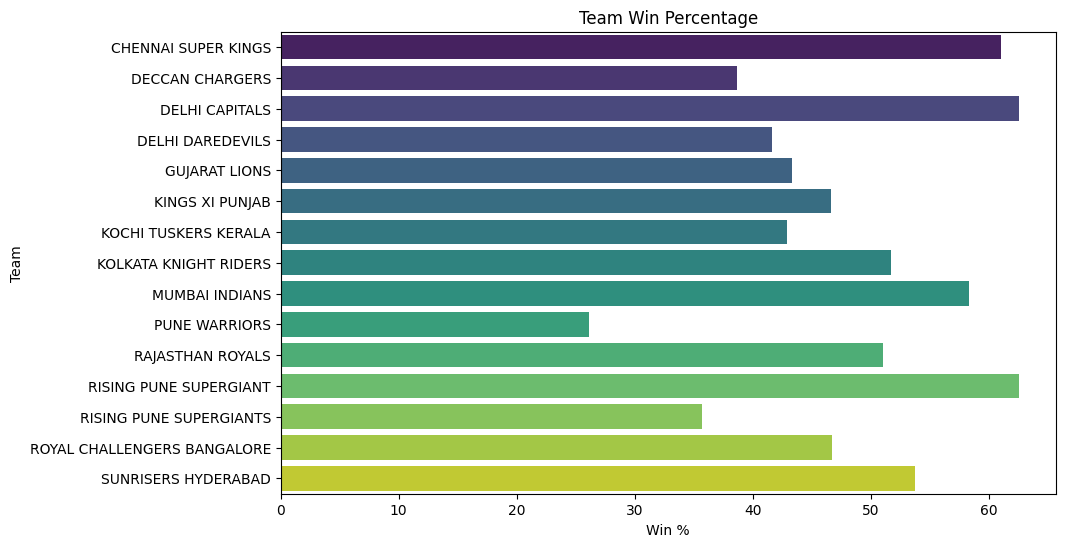

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=team_perf, x='win_percentage', y='team', palette='viridis')
plt.title("Team Win Percentage")
plt.xlabel("Win %")
plt.ylabel("Team")
plt.show()


In [18]:
team_runs = dev.groupby('batting_team_franchies')['total_runs'].sum().reset_index()
team_runs.columns = ['team', 'total_runs']
team_runs


,team,total_runs
0,Bangalore,28125
1,Chennai,26418
2,Delhi,27017
3,Gujarat,4862
4,Hydrabad,28518
5,Kochi,1901
6,Kolkata,27415
7,Mumbai,29806
8,Pune,8421
9,Punjab,27891


In [22]:
team_rr = (
    dev.groupby('batting_team_franchies')['total_runs'].sum() /
    dev.groupby('batting_team_franchies')['ball'].count()
) * 6

team_rr = team_rr.reset_index()
team_rr.columns = ['team', 'run_rate']
team_rr


,team,run_rate
0,Bangalore,8.072232
1,Chennai,8.021254
2,Delhi,7.833285
3,Gujarat,8.180595
4,Hydrabad,7.798551
5,Kochi,7.209861
6,Kolkata,7.888452
7,Mumbai,7.907849
8,Pune,7.194361
9,Punjab,7.995891


C:\Users\HP\AppData\Local\Temp\ipykernel_36992\3045636478.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_rr, x='run_rate', y='team', palette='magma')


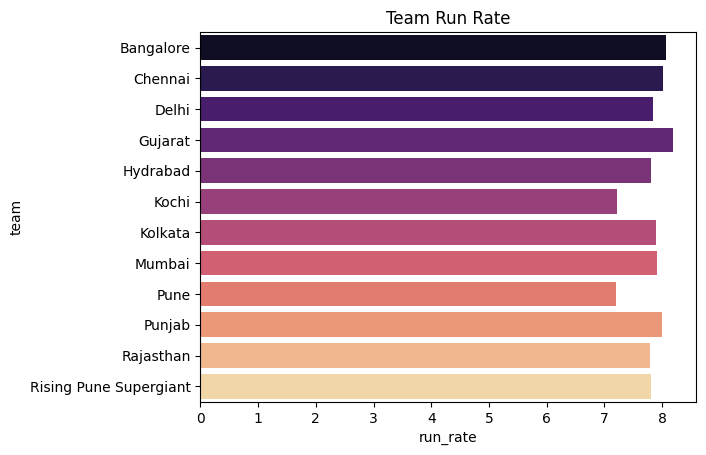

In [23]:
sns.barplot(data=team_rr, x='run_rate', y='team', palette='magma')
plt.title("Team Run Rate")
plt.show()


In [25]:
team_wickets = dev[dev['player_dismissed'] != 'NOT OUT'] \
    .groupby('bowling_team_franchies') \
    .size().reset_index(name='wickets')

team_wickets


,bowling_team_franchies,wickets
0,Bangalore,1036
1,Chennai,1030
2,Delhi,1020
3,Gujarat,151
4,Hydrabad,1098
5,Kochi,74
6,Kolkata,1010
7,Mumbai,1138
8,Pune,314
9,Punjab,994


In [27]:
team_bowl_rr = (
    dev.groupby('bowling_team_franchies')['total_runs'].sum() /
    dev.groupby('bowling_team_franchies')['ball'].count()
) * 6

team_bowl_rr = team_bowl_rr.reset_index()
team_bowl_rr.columns = ['team', 'economy_rate']
team_bowl_rr


,team,economy_rate
0,Bangalore,8.072260
1,Chennai,7.731649
2,Delhi,7.971768
3,Gujarat,8.614951
4,Hydrabad,7.782922
5,Kochi,7.382900
6,Kolkata,7.844214
7,Mumbai,7.700924
8,Pune,7.610294
9,Punjab,8.178039


C:\Users\HP\AppData\Local\Temp\ipykernel_36992\4214897368.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_bowl_rr, x='economy_rate', y='team', palette='magma')


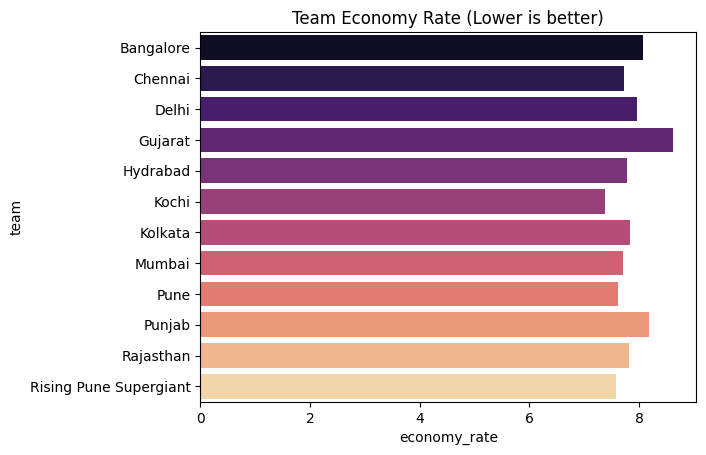

In [29]:
sns.barplot(data=team_bowl_rr, x='economy_rate', y='team', palette='magma')
plt.title("Team Economy Rate (Lower is better)")
plt.show()


In [33]:
team_wickets = (
    dev[deliveries['player_dismissed'] != 'NOT OUT']
    .groupby('bowling_team_franchies')
    .size()
    .reset_index(name='total_wickets')
)

team_wickets



,bowling_team_franchies,total_wickets
0,Bangalore,1036
1,Chennai,1030
2,Delhi,1020
3,Gujarat,151
4,Hydrabad,1098
5,Kochi,74
6,Kolkata,1010
7,Mumbai,1138
8,Pune,314
9,Punjab,994


In [35]:
wickets_per_match = (
    deliveries[deliveries['player_dismissed'] != 'NOT OUT']
    .groupby('bowling_team_franchies')['match_id']
    .nunique()
    .reset_index(name='matches_with_wickets')
)

team_wickets_match = team_wickets.merge(wickets_per_match, on='bowling_team_franchies')
team_wickets_match['wickets_per_match'] = (
    team_wickets_match['total_wickets'] / team_wickets_match['matches_with_wickets']
)
team_wickets_match


,bowling_team_franchies,total_wickets,matches_with_wickets,wickets_per_match
0,Bangalore,1036,179,5.787709
1,Chennai,1030,164,6.280488
2,Delhi,1020,173,5.895954
3,Gujarat,151,28,5.392857
4,Hydrabad,1098,183,6.000000
5,Kochi,74,14,5.285714
6,Kolkata,1010,177,5.706215
7,Mumbai,1138,185,6.151351
8,Pune,314,60,5.233333
9,Punjab,994,173,5.745665


deliveries columns: ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind', 'fielder', 'batting_team_franchies', 'bowling_team_franchies', 'year']

team_wickets head:
                   bowling_team  total_wickets
8                Mumbai Indians           1138
13  Royal Challengers Bangalore           1036
0           Chennai Super Kings           1030
7         Kolkata Knight Riders           1010
5               Kings XI Punjab            994


C:\Users\HP\AppData\Local\Temp\ipykernel_36992\627418827.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_wickets, y='team', x='total_wickets', palette='coolwarm')


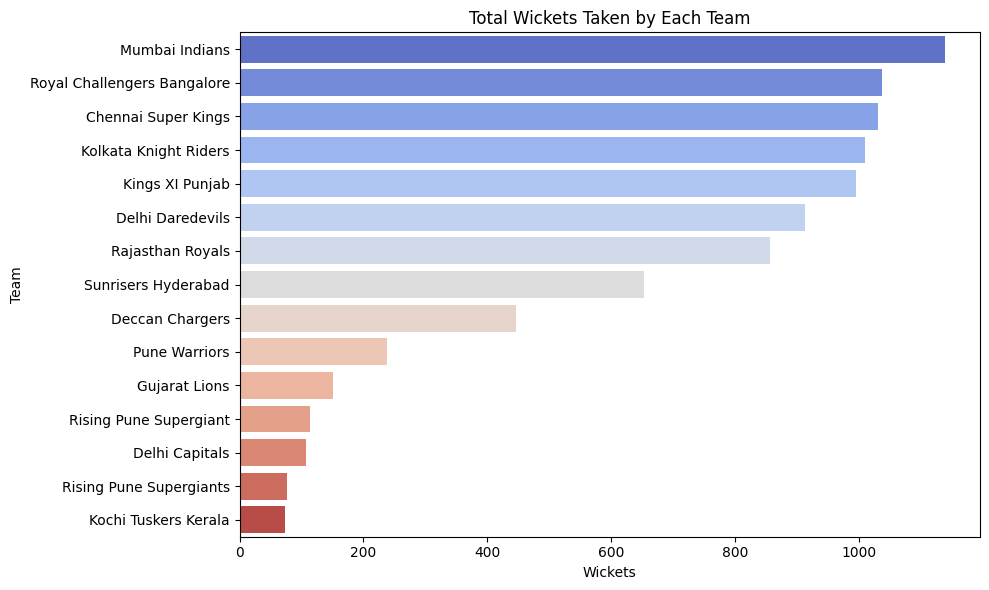

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("deliveries columns:", deliveries.columns.tolist())

bowling_col = None
for cand in ['bowling_franchise', 'bowling_team', 'bowling']:
    if cand in deliveries.columns:
        bowling_col = cand
        break

if bowling_col is None:
    raise ValueError("No bowling column found in deliveries. Columns available: " + ", ".join(deliveries.columns))

mask_wicket = deliveries['player_dismissed'].astype(str).str.upper() != 'NOT OUT'
team_wickets = (
    deliveries.loc[mask_wicket]
    .groupby(bowling_col)
    .size()
    .reset_index(name='total_wickets')
    .sort_values('total_wickets', ascending=False)
)

print("\nteam_wickets head:")
print(team_wickets.head())

team_wickets = team_wickets.rename(columns={bowling_col: 'team'})

plt.figure(figsize=(10,6))
sns.barplot(data=team_wickets, y='team', x='total_wickets', palette='coolwarm')
plt.title("Total Wickets Taken by Each Team")
plt.xlabel("Wickets")
plt.ylabel("Team")
plt.tight_layout()
plt.show()
